In [16]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from statsmodels.api import OLS

In [30]:
raw_market = pd.read_pickle('ryu_mktcap2.pickle')
raw_price = pd.read_pickle('ryu_price2.pickle')

raw_market.index = pd.to_datetime(raw_market.index)
raw_price.index = pd.to_datetime(raw_price.index)

In [31]:
# masked_mktcap = raw_market[marketcap_moving_average>1_000_000]
# masked_price = raw_price[marketcap_moving_average>1_000_000]

masked_mktcap = raw_market[raw_market>1_000_000]
masked_price = raw_price[raw_market>1_000_000]

In [32]:
# effect_of_shares = raw_market / (raw_market.shift(1)*(1+raw_price.pct_change()))
# effect_of_shares = effect_of_shares -1

effect_of_shares = masked_mktcap / (masked_mktcap.shift(1)*(1+masked_price.pct_change(fill_method=None)))
effect_of_shares = effect_of_shares -1

In [33]:
for i, val in enumerate(effect_of_shares.max()):
    if np.abs(val) > 10000:
        print(effect_of_shares.columns[i], val)

In [34]:
problems = []
for i,val in enumerate(effect_of_shares.sum()):
    if np.abs(val) > 1000:
        problems.append(effect_of_shares.columns[i])
    elif val < -0.9:
        problems.append(effect_of_shares.columns[i])
print(len(problems))

1


In [35]:
problems

['DEPAY']

In [36]:
clean_mktcap = masked_mktcap.drop(problems, axis=1)
clean_price = masked_price.drop(problems, axis=1)

In [37]:
# problems2 = []
# for i, val in enumerate(masked_mktcap.pct_change().max()):
#     if val > 10000:
#         problems2.append(masked_mktcap.columns[i])
#         #print(clean_mktcap.columns[i], val)

# clean_mktcap = clean_mktcap.drop(problems2, axis=1)
# clean_price = clean_price.drop(problems2, axis=1)

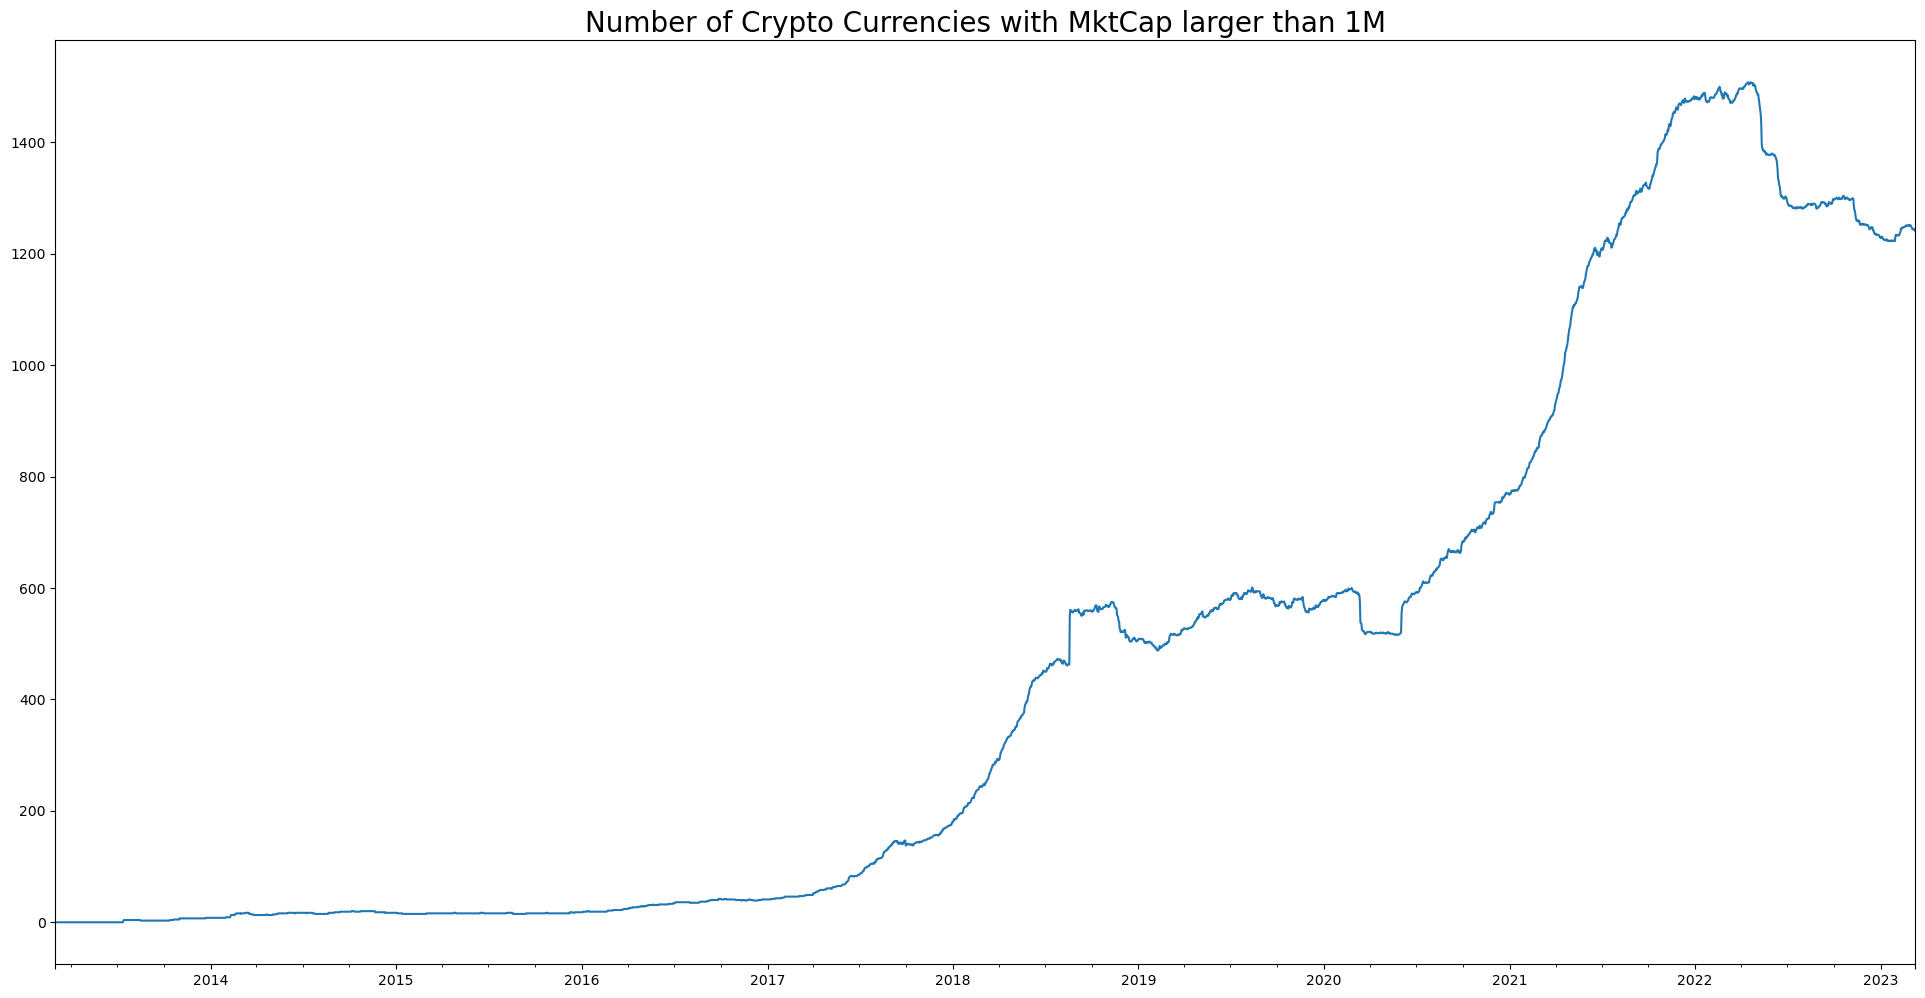

In [38]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
masked_mktcap.count(1).plot(figsize=(24,12));

In [26]:
clean_mktcap_moving_average = clean_mktcap.rolling(20).mean()
clean_mktcap = clean_mktcap[clean_mktcap_moving_average>1_000_000]
clean_price = clean_price[clean_mktcap_moving_average>1_000_000]

<AxesSubplot:title={'center':'Number of Crypto Currencies with MktCap larger than 1M'}>

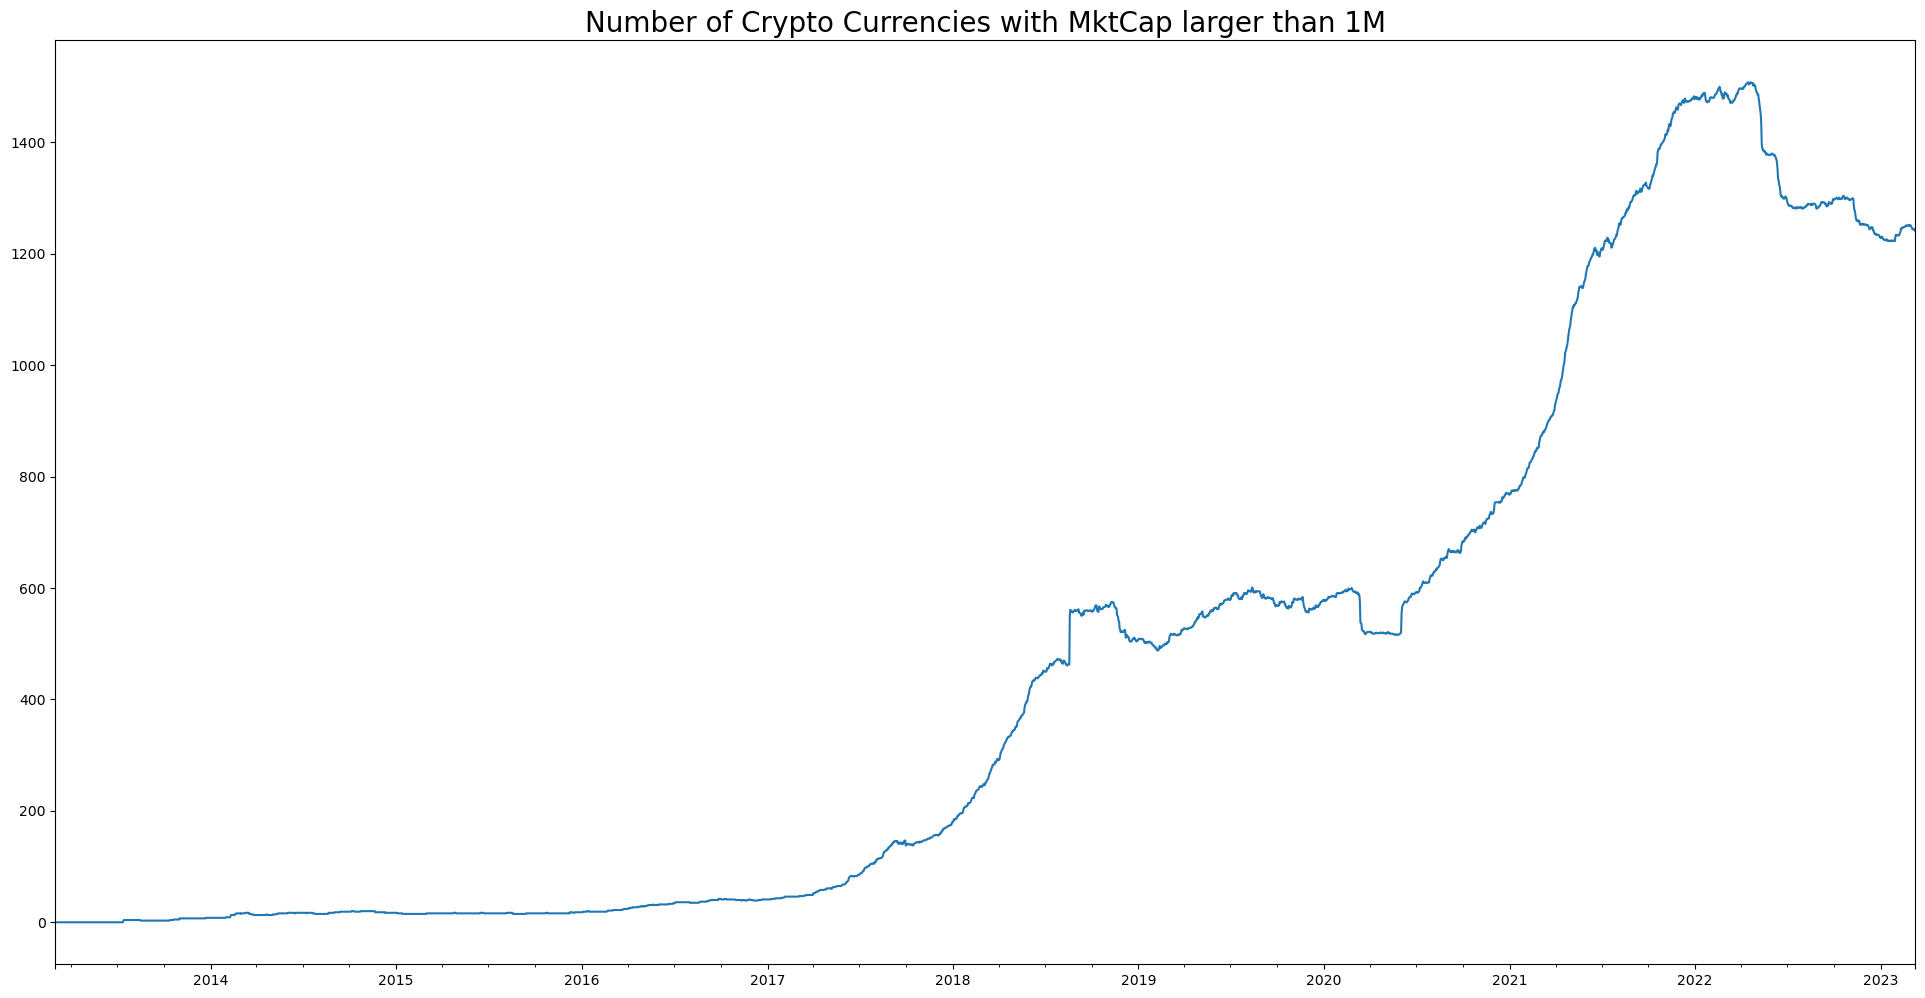

In [27]:
plt.figure()
plt.title("Number of Crypto Currencies with MktCap larger than 1M", size=20)
clean_mktcap.count(1).plot(figsize=(24,12))

In [28]:
for year in ["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]:
    numbers = (len(clean_price.columns) - clean_price.loc[year].isna().sum(1)).max()
    tmp_mktcap = clean_mktcap.loc[year]

    if year == "2013":
        print("year", "Number", "Mean", "Median")
    print(year, numbers, tmp_mktcap.mean(axis=0).mean()/1_000_000, tmp_mktcap.median(axis=0).median()/1_000_000)

print('total', (len(clean_price.columns) - clean_price.isna().sum(1)).max(), clean_mktcap.mean(axis=0).mean()/1_000_000, clean_mktcap.median(axis=0).median()/1_000_000)

year Number Mean Median
2013 8 567.6579268639737 11.9089025
2014 20 249.06873895706929 3.2105725
2015 18 180.00714819091297 4.206496
2016 42 202.13464155709647 5.011068
2017 180 730.7420453872068 16.89778
2018 575 376.6780067010782 6.82310375
2019 601 249.32639691849434 4.914264
2020 771 346.0721919445295 5.9189405
2021 1483 1063.3957080738742 11.81977225
2022 1508 711.2605838616321 5.8814145
2023 1252 787.7637606925543 12.272891
total 1508 283.85718980528713 5.4267425


In [29]:
clean_price.to_pickle("ryu_price2.pickle")
clean_mktcap.to_pickle("ryu_mktcap2.pickle")